In [34]:
import torch
import cv2
import numpy as np
import torchvision.transforms as transforms
from PIL import Image
from matplotlib import pyplot as plt

# Load the model
model = torch.hub.load("intel-isl/MiDaS", "MiDaS")
model.eval()

# Transform the input
transform = transforms.Compose(
    [
        transforms.Resize((384, 384)),  # Resize to dimensions divisible by 32
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

# Load the image
img = Image.open("assets/game_csgo_2.jpg")
img = transform(img).unsqueeze(0)

# Run the model
with torch.no_grad():
    prediction = model(img)

# Convert the prediction to a numpy array
depth_map = prediction[0].cpu().numpy()

# Normalize the depth map
depth_map = cv2.normalize(depth_map, None, 255, 0, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)



Using cache found in /Users/egemengulpinar/.cache/torch/hub/intel-isl_MiDaS_master


Loading weights:  None


Using cache found in /Users/egemengulpinar/.cache/torch/hub/facebookresearch_WSL-Images_main


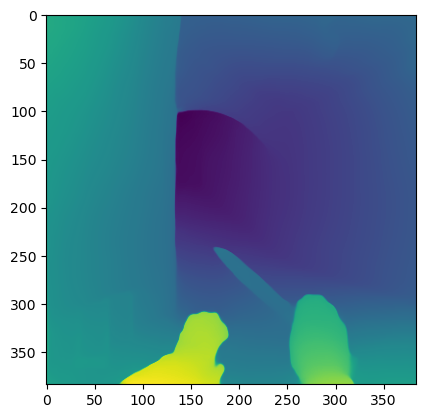

In [35]:
# Display the depth map

plt.imshow(depth_map)
plt.show()
